In [ ]:
# YOLO using AlexeyAB github which was not successful 
#!git clone https://github.com/AlexeyAB/darknet

In [18]:
# Install YOLO using ultralytics
#!pip install ultralytics 

In [21]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [39]:
model = YOLO("yolov8m.pt")

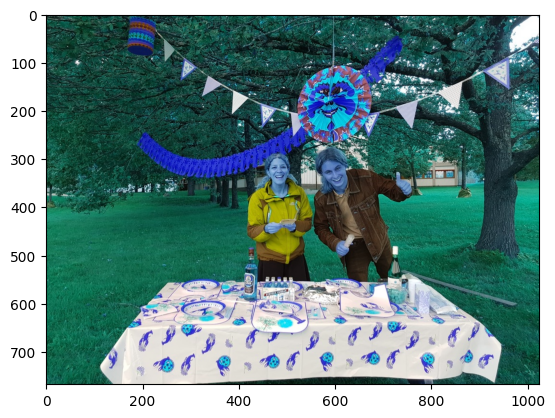

In [81]:
img=cv2.imread("party.jpeg")
plt.imshow(img)

In [82]:
result=model(img)
print(result)


0: 480x640 2 persons, 3 kites, 3 bottles, 1 cup, 1 dining table, 896.8ms
Speed: 4.5ms preprocess, 896.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

In [83]:
bboxes = result[0].boxes.xyxy
bboxes = np.array(result[0].boxes.xyxy.cpu(), dtype="int")
classes = np.array(result[0].boxes.cls.cpu(), dtype="int")
print(bboxes, classes)

[[554 277 762 557]
 [416 287 554 556]
 [520  44 743 272]
 [115 536 949 767]
 [409 484 440 595]
 [708 481 739 597]
 [168   6 229  87]
 [170   6 541 342]
 [769 569 798 626]
 [736 547 753 600]] [ 0  0 33 60 39 39 33 33 41 39]


In [84]:
for cls, bbox in zip(classes, bboxes):
    (x, y, x2, y2) = bbox
    #image = cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2.rectangle(img, (x, y), (x2, y2), (0, 0, 225), 2)
    cv2.putText(img,str(cls), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

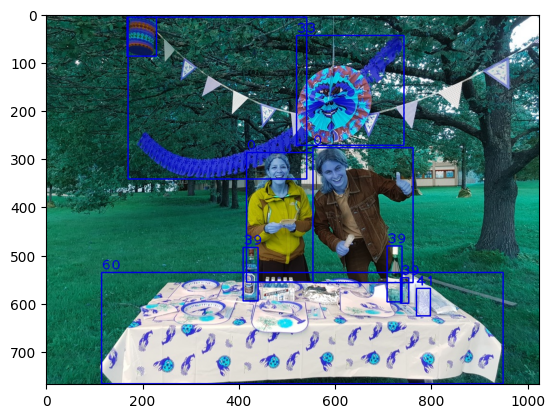

In [85]:
plt.imshow(img)

In [ ]:
#how to make for videos
#https://pysource.com/2023/03/28/object-detection-with-yolo-v8-on-mac-m1/